In [16]:
import os

!pip install matplotlib -q
!pip install pandas

ERROR: Invalid requirement: 'pandas,'


In [4]:
!ls $HOME/DSfromScratch/raw-data

sample_submission.csv  specs.csv  test.csv  train.csv  train_labels.csv


In [5]:
home = os.environ['HOME']
home

'/home/alex'

In [7]:
home = os.path.join(os.environ['HOME'], 'DSfromScratch', 'raw-data')
print(home)

/home/alex/DSfromScratch/raw-data


In [8]:
os.listdir(home)

['train.csv',
 'sample_submission.csv',
 'train_labels.csv',
 'specs.csv',
 'test.csv']

In [10]:
!pip install pandas -q
import pandas as pd

In [68]:
raw_data = {}

for fi in os.listdir(home):
    if 'csv' in fi:
        print(fi)
        raw_data[fi] = pd.read_csv(os.path.join(home, fi), nrows=1000)

train.csv
sample_submission.csv
train_labels.csv
specs.csv
test.csv


## Basic data inspection

Look at all csv

In [69]:
raw_data.keys()

dict_keys(['train.csv', 'sample_submission.csv', 'train_labels.csv', 'specs.csv', 'test.csv'])

In [44]:
for name, df in raw_data.items():
    print(name, df.shape)
    print(df.columns)
    print(' ')

In [70]:
labels = raw_data['train_labels.csv']

set(labels.loc[:, 'accuracy_group'])

{0, 1, 2, 3}

## Inspecting four classes

In [46]:
import matplotlib as plt

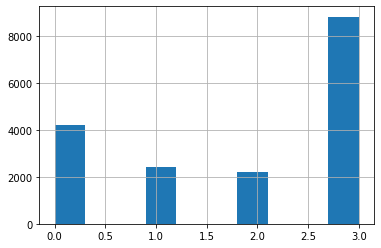

In [47]:
labels.loc[:, 'accuracy_group'].hist()

Number of installs

In [57]:
data['train_labels.csv']

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3
...,...,...,...,...,...,...,...
995,9507dce5cf79f15d,0cb56246,Bird Measurer (Assessment),1,0,1.0,3
996,abdcb438657be84c,0cb56246,Mushroom Sorter (Assessment),1,0,1.0,3
997,08ef542a5e2eba09,0cc1d512,Mushroom Sorter (Assessment),1,0,1.0,3
998,770694057c9c34d3,0cc1d512,Cart Balancer (Assessment),1,0,1.0,3


In [60]:
len(set(labels.loc[:, 'installation_id']))

3614

In [71]:
def inspect_df(data, csv):
    df = data[csv]
    for col in df.columns:
        print(col)
        uniq = len(set(df.loc[:, col]))
        print('num. uniques {}'.format(uniq))
        print(uniq / df.shape[0])
        print(' ')
inspect_df(raw_data, 'train_labels.csv')

game_session
num. uniques 1000
1.0
 
installation_id
num. uniques 179
0.179
 
title
num. uniques 5
0.005
 
num_correct
num. uniques 2
0.002
 
num_incorrect
num. uniques 20
0.02
 
accuracy
num. uniques 19
0.019
 
accuracy_group
num. uniques 4
0.004
 


In [72]:
df = raw_data['train_labels.csv']

mask = df.loc[:,'accuracy_group'] == 0

sub = df.loc[mask, :]
sub.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
7,b2297d292892745a,0006c192,Mushroom Sorter (Assessment),0,4,0.0,0
9,7b536271e99518f0,001d0ed0,Bird Measurer (Assessment),0,5,0.0,0
10,8fdd5d389d0e272e,001d0ed0,Chest Sorter (Assessment),0,1,0.0,0
14,619b9c069cf790ca,00225f67,Bird Measurer (Assessment),0,2,0.0,0


In [28]:
set(sub.loc[:, 'num_correct'])

{0}

In [29]:
set(df.loc[:, 'num_correct'])

{0, 1}

In [30]:
mask = df['num_correct'] == 1

mask

0         True
1        False
2         True
3         True
4         True
         ...  
17685     True
17686     True
17687     True
17688    False
17689     True
Name: num_correct, Length: 17690, dtype: bool

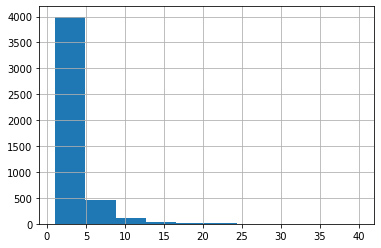

In [32]:
mask2 = df['num_incorrect'] > 0

df.loc[mask & mask2, :].loc[:, 'num_incorrect'].hist()

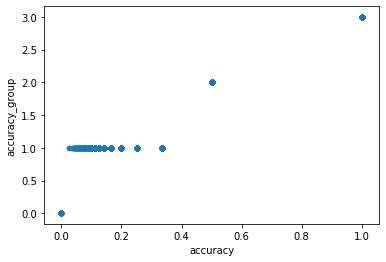

In [33]:
df.plot.scatter('accuracy', 'accuracy_group')

In [34]:
!pip install seaborn

     |████████████████████████████████| 215kB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 5.9MB/s eta 0:00:01


In [36]:
import seaborn as sns

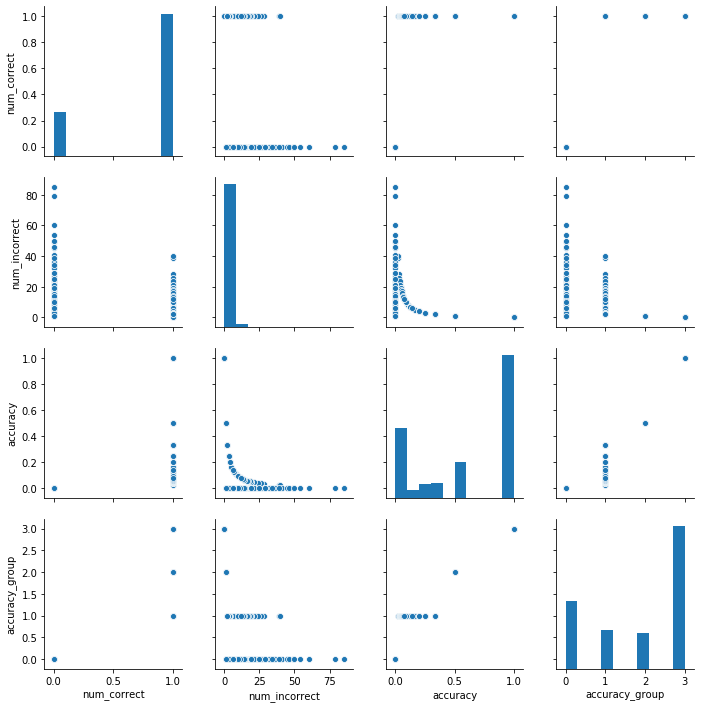

In [37]:
sns.pairplot(df)